# 막대그래프, 누적막대그래프, 묶은 막대그래프

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('/content/drive/MyDrive/data/data.xlsx')
df.head(5)

,product_id,product_type,product_name,size,colour,price,prd_quantity,description,sales_id,order_id,price_per_unit,sales_quantity,total_price,customer_id,payment,order_date,delivery_date,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",22,5,96,3,288,441,14719,2021-3-23,2021-03-24,Artemas Vasilischev,Bigender,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",1121,231,96,1,96,731,58824,2021-3-20,2021-04-09,Olimpia Tankus,Genderfluid,39,6434 Callum RoadApt. 396,3505,North Jessica,Western Australia,Australia
2,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",1741,353,96,3,288,774,46198,2021-3-30,2021-04-05,Ellynn Korba,Genderqueer,34,2096 Wilson MewsApt. 714,8590,West Jonathanshire,Tasmania,Australia
3,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",3201,644,96,2,192,207,52925,2021-3-13,2021-03-22,Brade Caught,Genderqueer,56,38 Baumbach Estate DrApt. 545,7847,Elijahburgh,Queensland,Australia
4,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",4962,992,96,3,288,770,53679,2021-7-23,2021-08-14,Thorsten Sowrey,Polygender,50,7024 Sauer DriveSuite 553,4196,Port Isabelle,South Australia,Australia


In [3]:
from datetime import datetime

In [4]:
datetime.strptime(df['order_date'][0],'%Y-%m-%d').strftime('%Y-%m-%d')

'2021-03-23'

In [5]:
df['order_date'].map( lambda x : datetime.strptime(x,'%Y-%m-%d').strftime('%Y-%m-%d') )

0       2021-03-23
1       2021-03-20
2       2021-03-30
3       2021-03-13
4       2021-07-23
           ...    
4995    2021-02-18
4996    2021-08-19
4997    2021-10-22
4998    2021-08-31
4999    2021-05-21
Name: order_date, Length: 5000, dtype: object

In [6]:
df['order_date'].map(lambda x : datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m-%d'))

0       2021-03-23
1       2021-03-20
2       2021-03-30
3       2021-03-13
4       2021-07-23
           ...    
4995    2021-02-18
4996    2021-08-19
4997    2021-10-22
4998    2021-08-31
4999    2021-05-21
Name: order_date, Length: 5000, dtype: object

In [7]:
df['order_date'] = df['order_date'].map(lambda x : datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m-%d'))
df.head(3)

,product_id,product_type,product_name,size,colour,price,prd_quantity,description,sales_id,order_id,price_per_unit,sales_quantity,total_price,customer_id,payment,order_date,delivery_date,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",22,5,96,3,288,441,14719,2021-03-23,2021-03-24,Artemas Vasilischev,Bigender,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",1121,231,96,1,96,731,58824,2021-03-20,2021-04-09,Olimpia Tankus,Genderfluid,39,6434 Callum RoadApt. 396,3505,North Jessica,Western Australia,Australia
2,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",1741,353,96,3,288,774,46198,2021-03-30,2021-04-05,Ellynn Korba,Genderqueer,34,2096 Wilson MewsApt. 714,8590,West Jonathanshire,Tasmania,Australia


In [8]:
sales_df = df.groupby('order_date').sales_quantity.sum().reset_index()
sales_df

,order_date,sales_quantity
0,2021-01-01,31
1,2021-01-02,52
2,2021-01-03,25
3,2021-01-04,41
4,2021-01-05,56
...,...,...
286,2021-10-20,25
287,2021-10-21,61
288,2021-10-22,45
289,2021-10-23,20


In [9]:
sales_df.loc[(sales_df['order_date'] >= '2021-01-01') & (sales_df['order_date'] < '2021-02-01')]

,order_date,sales_quantity
0,2021-01-01,31
1,2021-01-02,52
2,2021-01-03,25
3,2021-01-04,41
4,2021-01-05,56
5,2021-01-06,17
6,2021-01-07,42
7,2021-01-08,13
8,2021-01-09,45
9,2021-01-10,65


In [10]:
sales_jan_df = sales_df[(sales_df['order_date'] >= '2021-01-01') & (sales_df['order_date'] < '2021-02-01')]
sales_jan_df

,order_date,sales_quantity
0,2021-01-01,31
1,2021-01-02,52
2,2021-01-03,25
3,2021-01-04,41
4,2021-01-05,56
5,2021-01-06,17
6,2021-01-07,42
7,2021-01-08,13
8,2021-01-09,45
9,2021-01-10,65


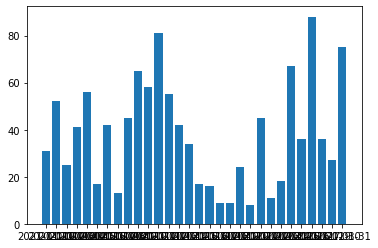

In [11]:
import matplotlib.pyplot as plt

plt.bar(sales_jan_df['order_date'], sales_jan_df['sales_quantity'])
plt.show()

Text(0, 0.5, 'sales quantity')

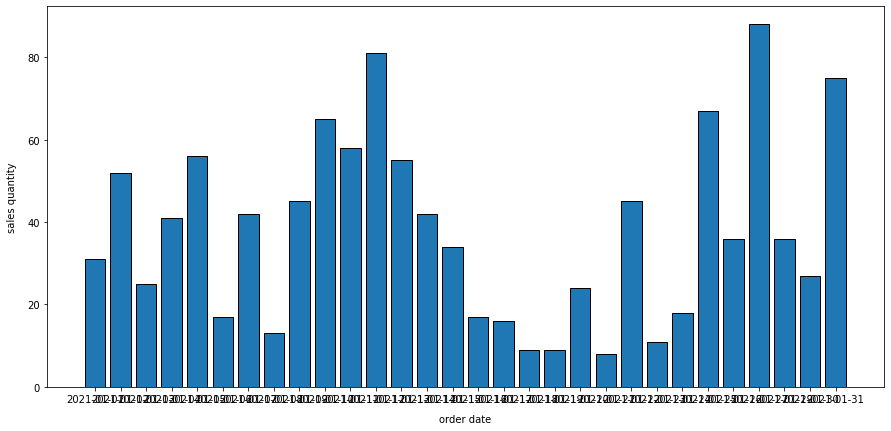

In [12]:
plt.figure(figsize=(15,7))
plt.bar(sales_jan_df['order_date'], sales_jan_df['sales_quantity'], width=0.8, edgecolor='black')

plt.xlabel('order date', labelpad=10)
plt.ylabel('sales quantity', labelpad=10)

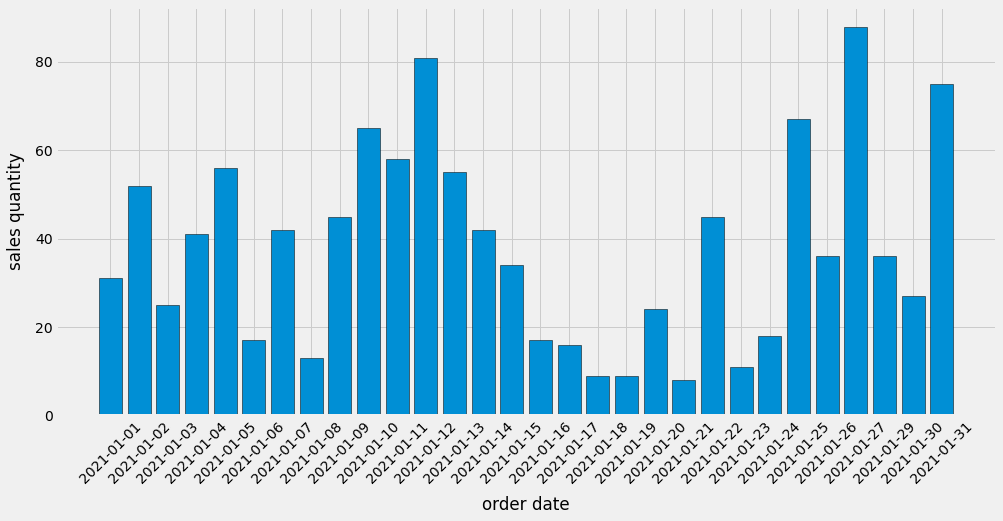

In [13]:
# https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html

plt.style.use('fivethirtyeight')

plt.figure(figsize=(15,7))
plt.bar(sales_jan_df['order_date'], sales_jan_df['sales_quantity'], width=0.8, edgecolor='black')

plt.xlabel('order date', labelpad=10)
plt.ylabel('sales quantity', labelpad=10)

plt.xticks(rotation=45)

plt.show()

In [14]:
df.head(3)

,product_id,product_type,product_name,size,colour,price,prd_quantity,description,sales_id,order_id,price_per_unit,sales_quantity,total_price,customer_id,payment,order_date,delivery_date,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",22,5,96,3,288,441,14719,2021-03-23,2021-03-24,Artemas Vasilischev,Bigender,53,33 Richards JunctionApt. 478,7650,South Rileyview,Western Australia,Australia
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",1121,231,96,1,96,731,58824,2021-03-20,2021-04-09,Olimpia Tankus,Genderfluid,39,6434 Callum RoadApt. 396,3505,North Jessica,Western Australia,Australia
2,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt",1741,353,96,3,288,774,46198,2021-03-30,2021-04-05,Ellynn Korba,Genderqueer,34,2096 Wilson MewsApt. 714,8590,West Jonathanshire,Tasmania,Australia


In [15]:
import numpy as np

prd_size_cnt = df.pivot_table(index='product_type', columns='size', values='sales_quantity', aggfunc='sum')
prd_size_cnt

size,L,M,S,XL,XS
product_type,,,,,
Jacket,676,683,672,618,694
Shirt,634,662,689,629,645
Trousers,688,691,631,699,651


Text(0, 0.5, 'sales_quantity')

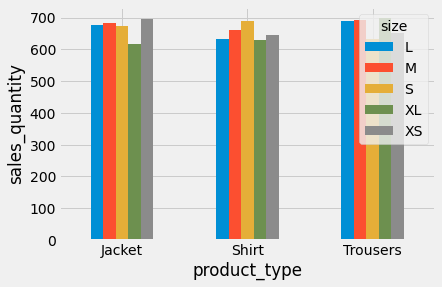

In [16]:
# https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.html

plt.style.use('fivethirtyeight')

ax = prd_size_cnt.plot(kind='bar', rot=0)
ax.set_ylabel('sales_quantity')

Text(0, 0.5, 'sales_quantity')

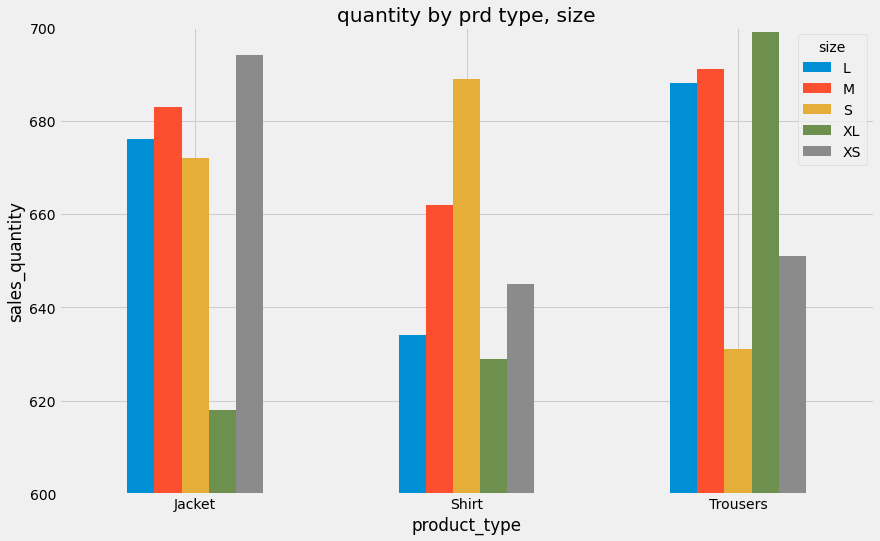

In [17]:
plt.style.use('fivethirtyeight')
ax = prd_size_cnt.plot(kind='bar', rot=0, figsize=(13,8), ylim=[600, 700], title='quantity by prd type, size')
ax.set_ylabel('sales_quantity')

Text(0, 0.5, 'sales_quantity')

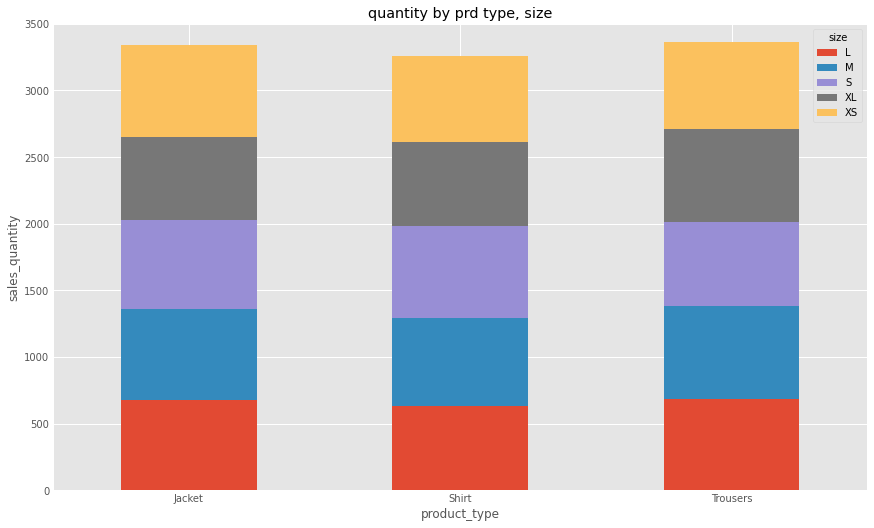

In [18]:
plt.style.use('ggplot')
ax = prd_size_cnt.plot(kind='bar', rot=0, figsize=(13,8), ylim=[0, 3500]
                       , title='quantity by prd type, size', stacked=True)
ax.set_ylabel('sales_quantity')

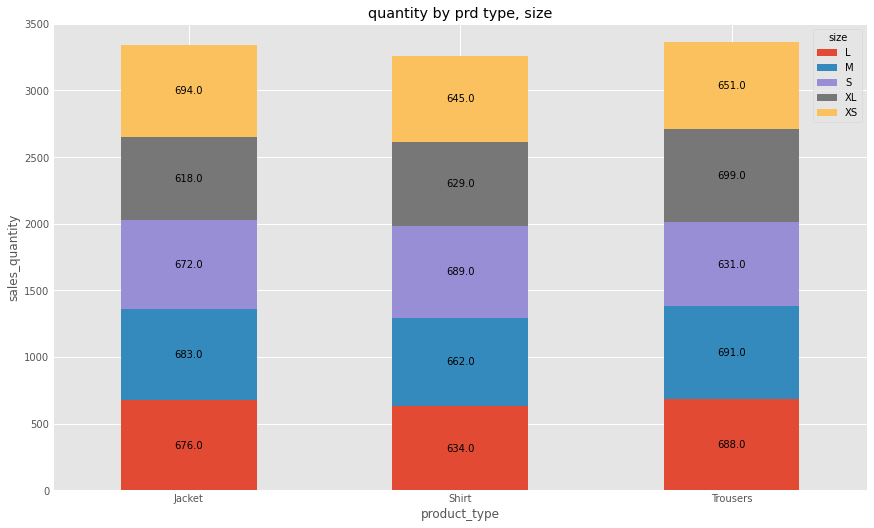

In [19]:
plt.style.use('ggplot')
ax = prd_size_cnt.plot(kind='bar', rot=0, figsize=(13,8), ylim=[0, 3500]
                       , title='quantity by prd type, size', stacked=True)
ax.set_ylabel('sales_quantity')

for c in ax.containers:
  labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
  ax.bar_label(c, labels=labels, label_type='center')

In [20]:
pip install matplotlib==3.4.1